# **Forecasting using Granger’s Causality and Vector Auto-regressive Model**
- [address of ref](https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6)

---

---

- how to use Granger’s Causality Test to test the relationships of multiple variables in the time series and Vector Auto Regressive Model (VAR) to forecast the future Gold & Oil prices from the historical data of Gold prices, Silver prices, Crude Oil prices, Stock index , Interest Rate and USD rate.



-  A hike in Oil prices will have positive impact on Gold prices and vice versa
- when there is a hike in equities(주가), Gold prices goes down.

- *The objective is to see if the series is affected by its own past and also the past of the other series*

- This kind of series allow us to model `the dynamics of the series itself` and also the interdependence of `other series.` 
- We will explore this inter-dependence through *Granger’s Causality Analysis.*

---

---

> ## **Exploratory analysis**

- cover some areas here to get insights of the data

- 결측치는 'pad'방법(앞의 값으로 결측치를 채우는 방식)을 사용했음
  - 앞의 값이 존재하지 않아서 pad로 대체할 수 없는 경우엔 버렸음

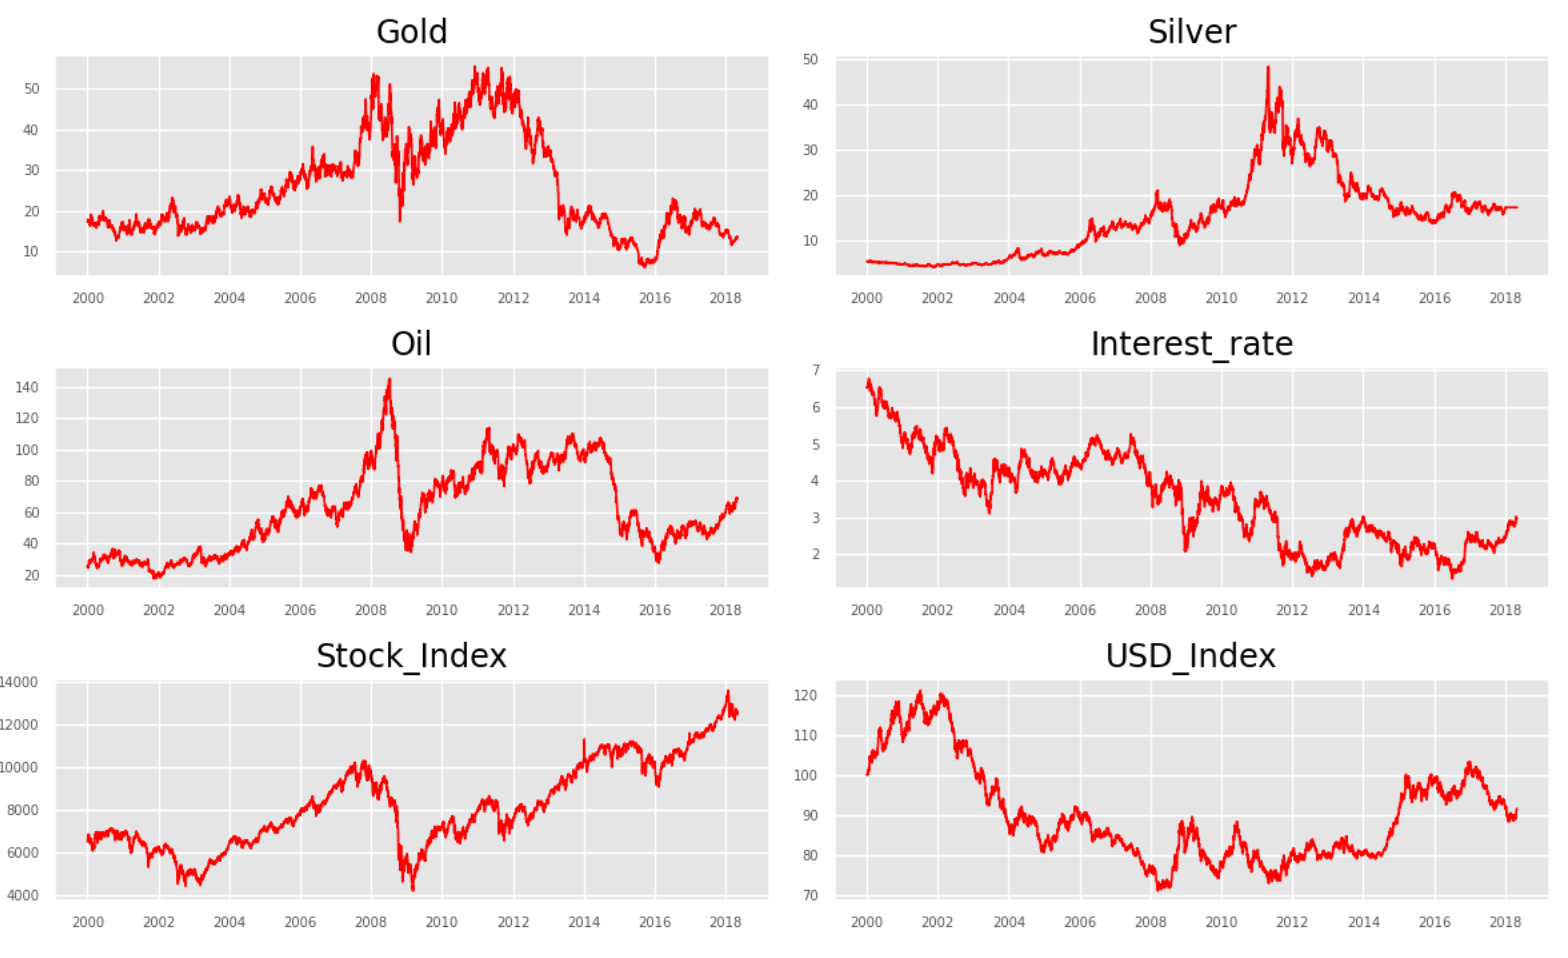

- all the series contain unit root with stochastic trend showing a systematic pattern that is unpredictable.
- To extract maximum information from our data, it is important to have a normal or Gaussian distribution of the data. To check for that, we have done a normality test based on the Null and Alternate Hypothesis intuition.
  - 주어진 data에 대해서 정규성 검증 수행


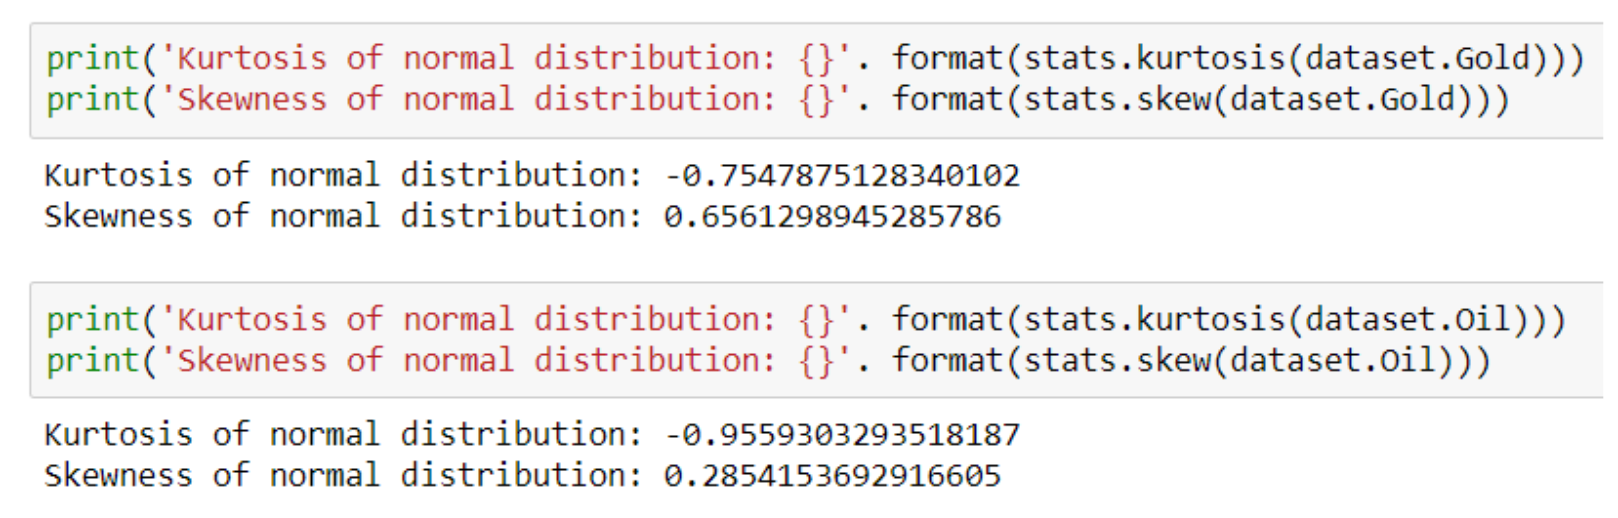

- The kurtosis of this dataset is -0.95. Since this value is less than 0, it is considered to be a light-tailed dataset.
- It has as much data in each tail as it does in the peak.
  - peak 지점과 더불어 꼬리 부분에도 많은 data가 분포돼 있음을 알 수 있다. 

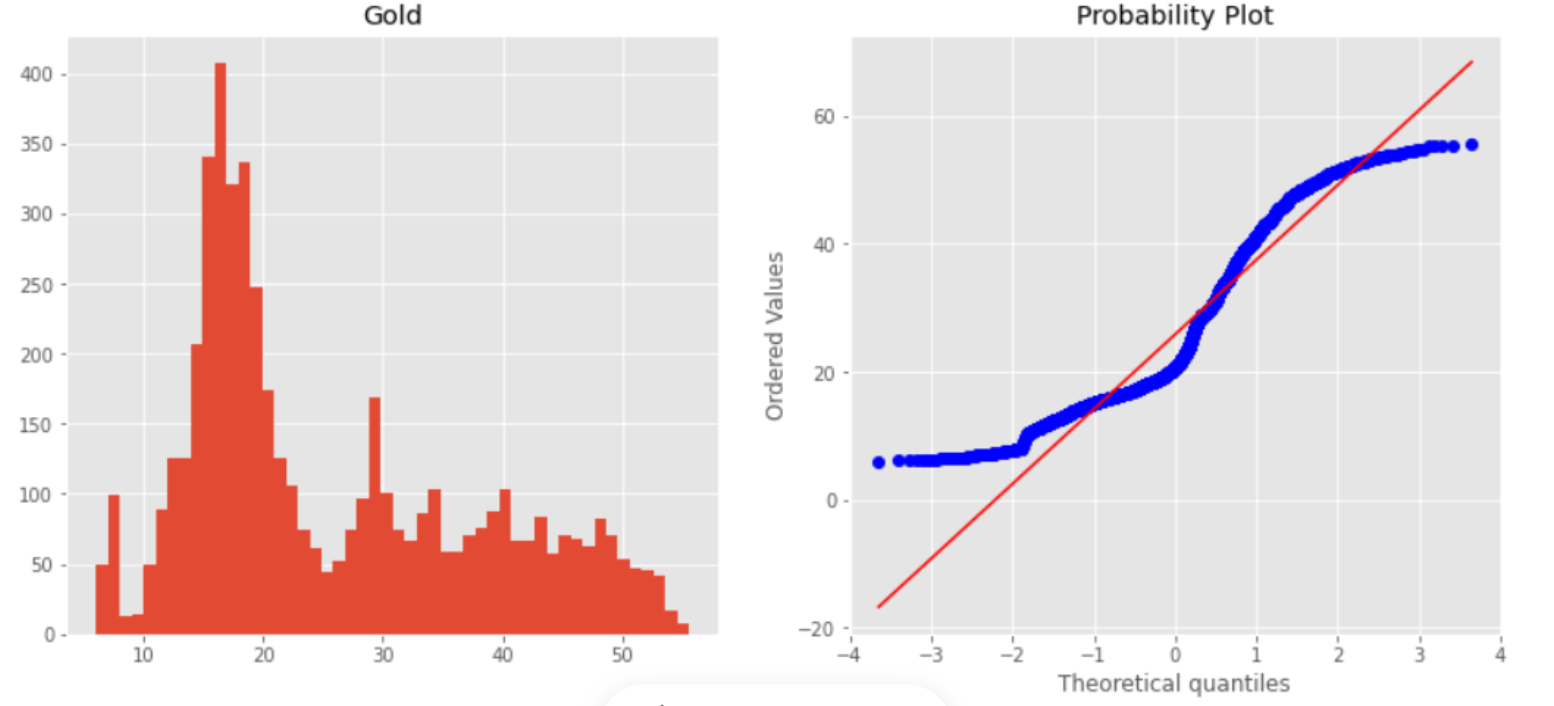

- 정규분포와도 거리가 있음을 알 수 있다. 

---

---

> ## **Auto-correlaiton**
- 자기 자신의 시계열과 지체된(past) 시계열 간의 상관계수를 의미

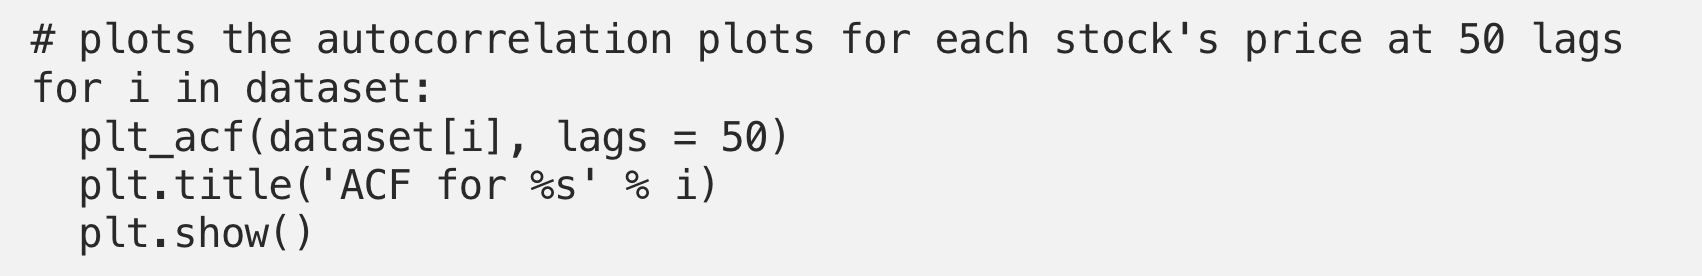

- We see here from the above plots, the auto-correlation of +1 which represents a perfect positive correlation which means, an increase seen in one time series leads to a proportionate increase in the other time series.
- We definitely need to apply transformation and neutralize this to make the series stationary.
- It measures linear relationships; even if the auto-correlation is minuscule, there may still be a nonlinear relationship between a time series and a lagged version of itself.

---

---

> ## **Train and Test Data**

VAR model : 시간이 지남에 따라 변하는 여러 수량 간의 관계를 캡처하는 데 사용되는 통계 모형. VAR은 확률적 프로세스 모델의 한 유형이다. VAR 모형은 다변수 시계열을 허용하여 단일 변수(일변수) 자기회귀 모형을 일반화한다. 

The VAR model will be fitted on X_train and then used to forecast the next 15 observations. These forecasts will be compared against the actual present in test data.



---

> ### **Transformation**

- Applying first differencing on training set to make all the series stationary.
  - 모든 시리즈에 대해 `정상성 확보 위해 차분 적용`
  - However, this is an iterative process where we after first differencing, the series may still be non-stationary.
  - 반복 수행하여도 `여전히 non-stationary`일 수 있다. 
  - `2차 차분`하거나 `log transformation 활용`

> 이때 stationary로의 변형이 왜 필요?

    시계열 데이터에서는 데이터를 생성하는 확률분포가 매 시점마다 다를 수 있다. (아래 그림을 참고하라)
    이런 경우 평균을 구하기 어렵다
    
    이때, Strict Stationary Process라면 가능해진다.
    기존의 데이터 분석에서 사용하는 통계량을 시계열 데이터에서도 사용할 수 있게 되는 조건이다. 
    
> 시계열의 정상성?

    시간의 흐름에 따라 통계적 특성이 변하지 않음
    이때 , 통계적 특성? = 주로 평균, 분산, 공분산 + 모든 분포적 특성을 통칭
    
> 정상성을 확보하는 목적?

    예측값이 튀지 않도록.
    넓은 범위의 값을 좁은 범위의 값으로 변경하여, 예측의 정확성을 높이기 위해서.

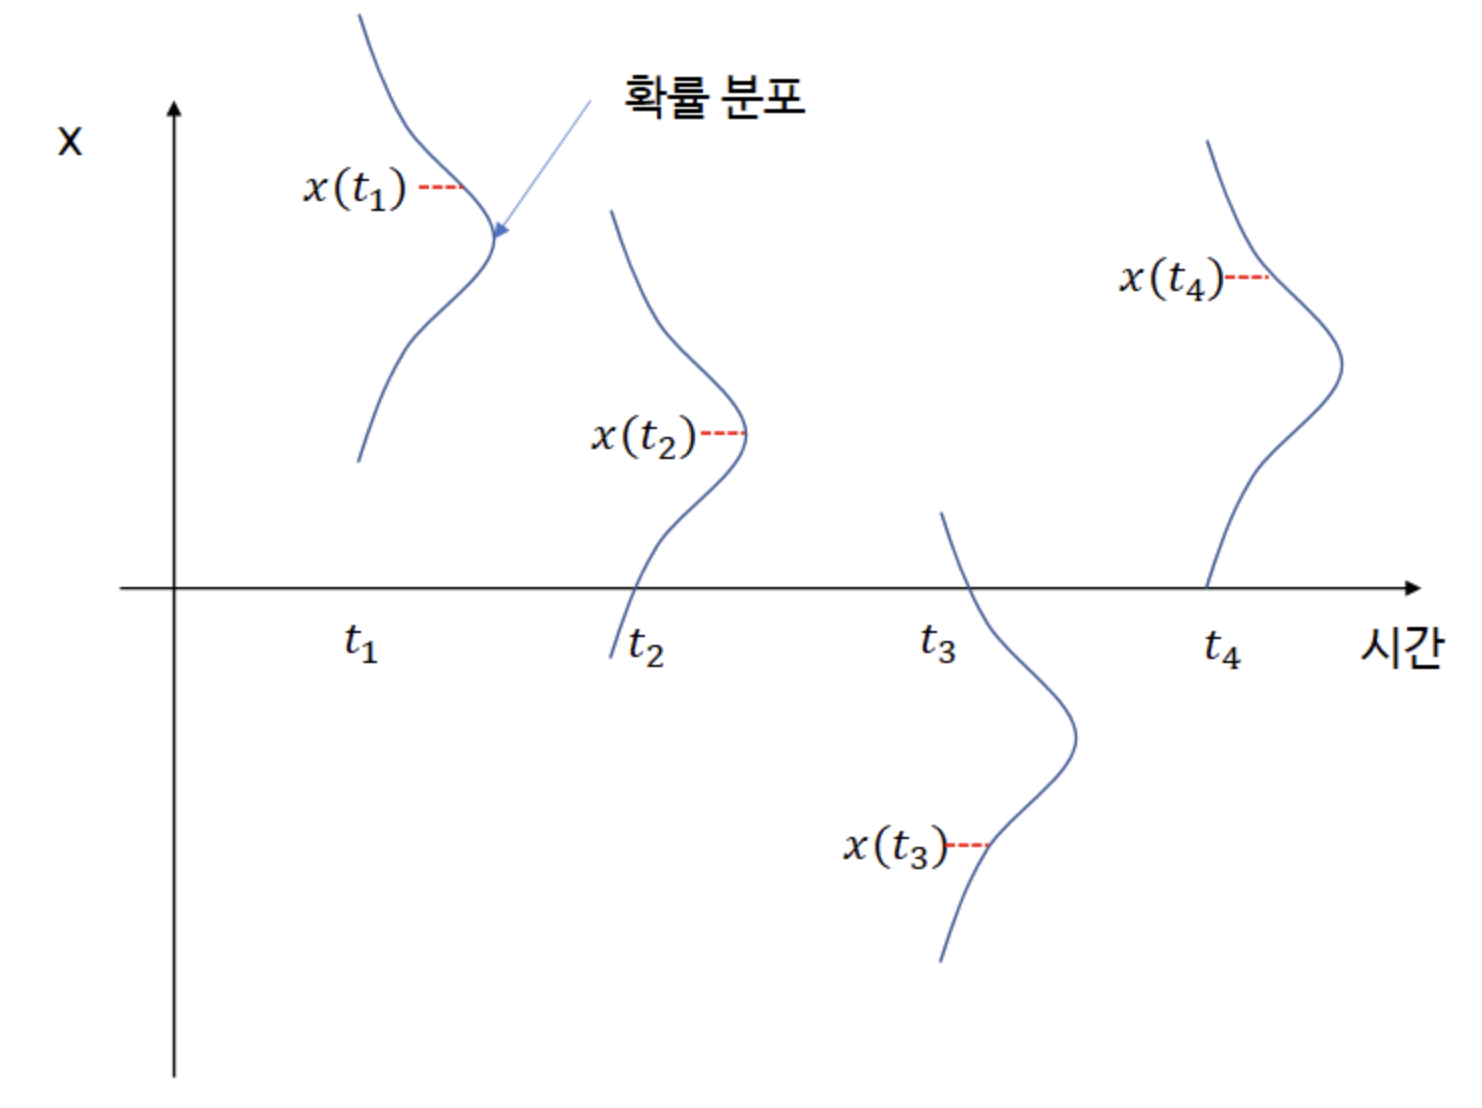

---

---

> ## **Stationary check**

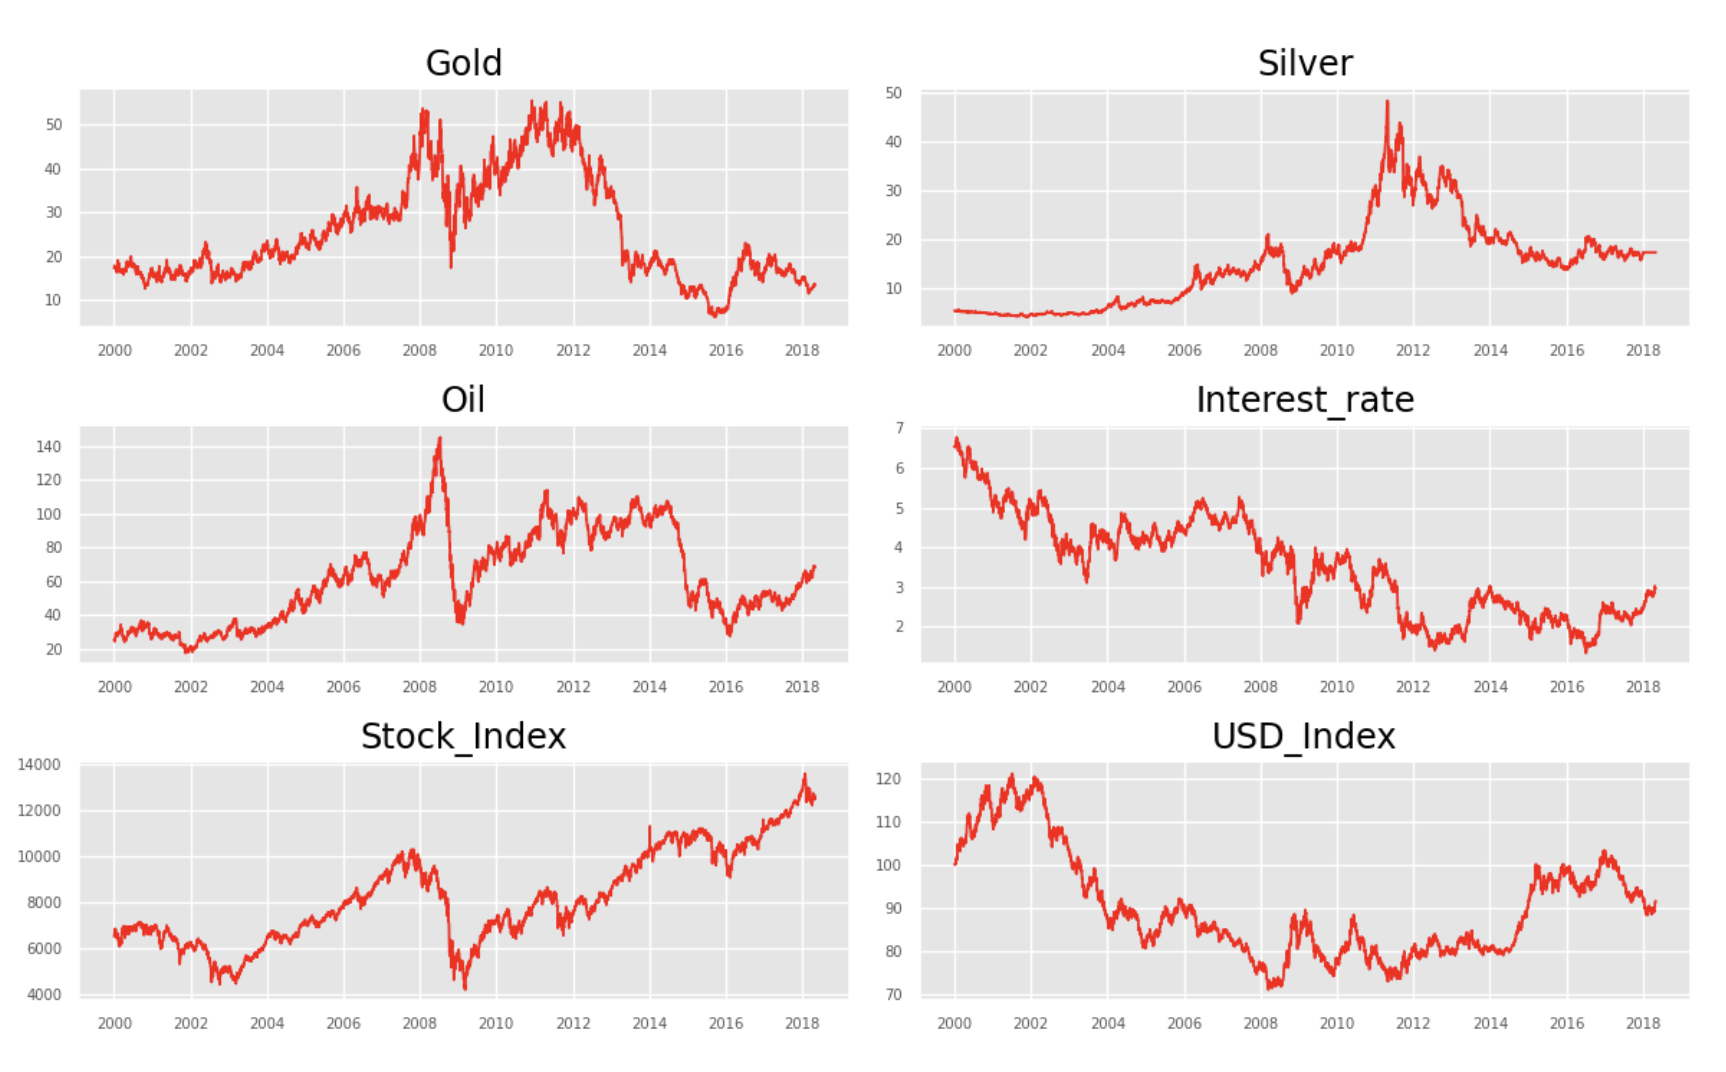

# $$\downarrow$$ $$\downarrow$$ $$\downarrow$$

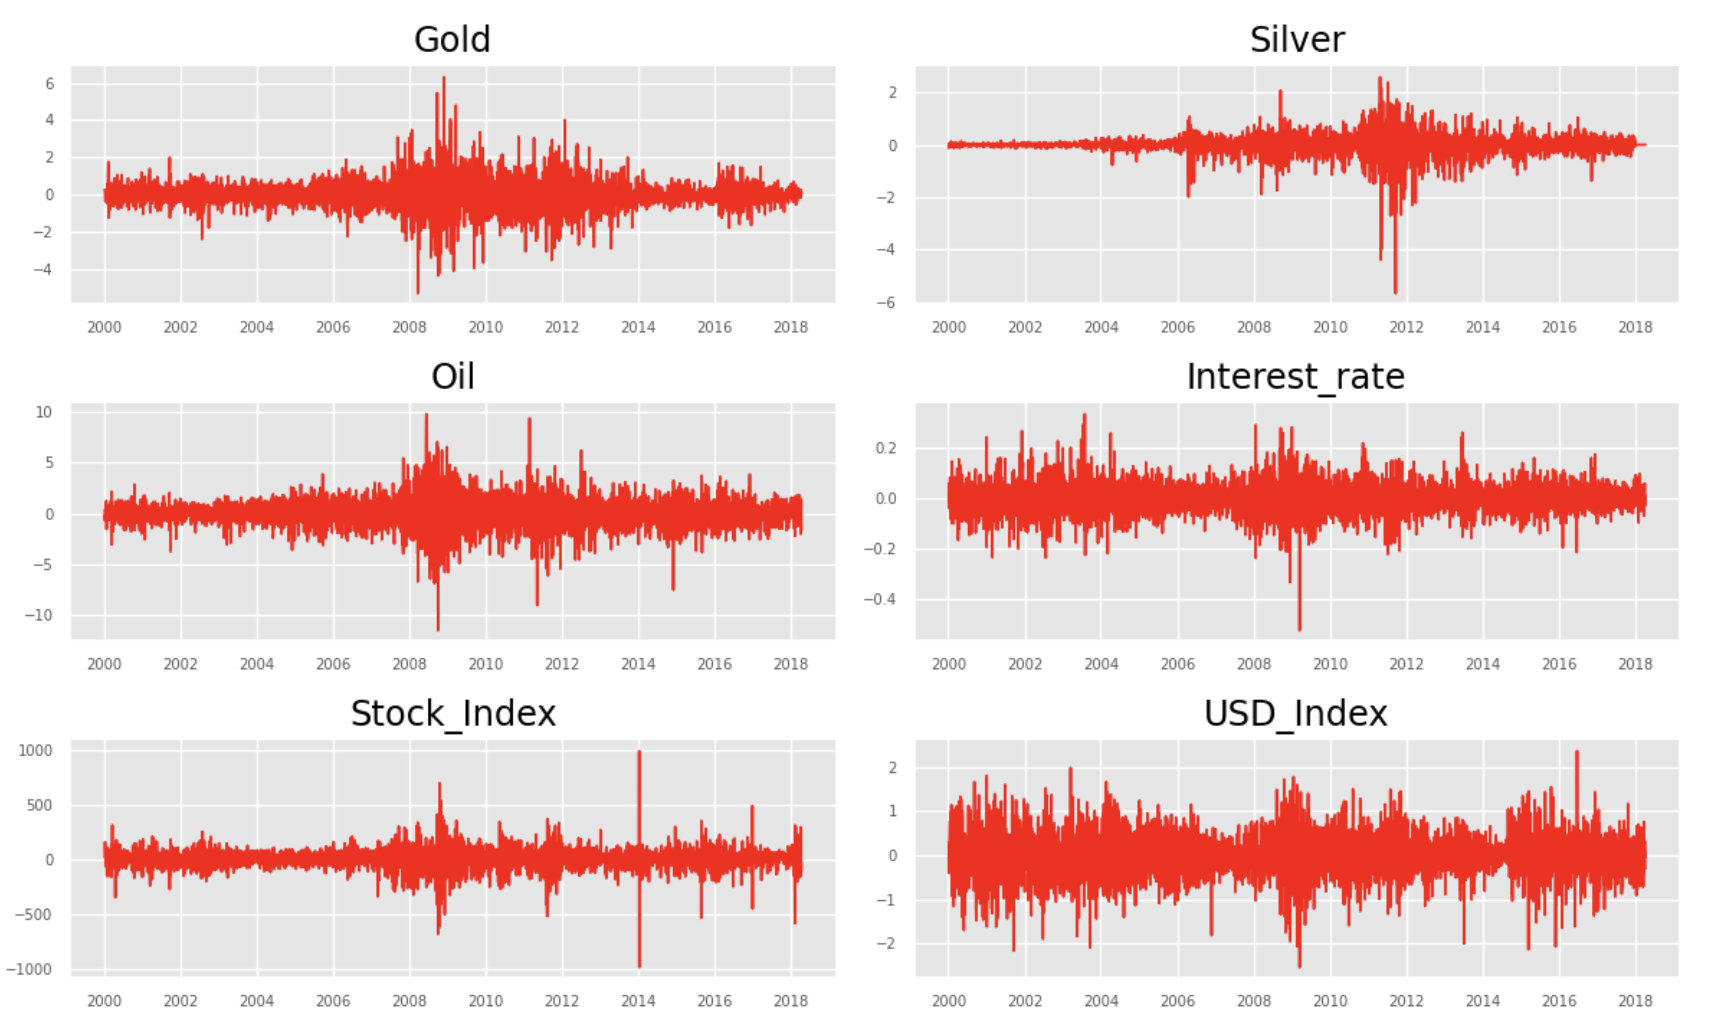

- stationary를 그림을 통해 확인할 수도 있지만 Augmented Dickey-Fuller Test를 통해서도 통계적인 방법을 통해 정량적으로 확인할 수 있다. 
  - 대표적인 stationary 검증 방법
  - 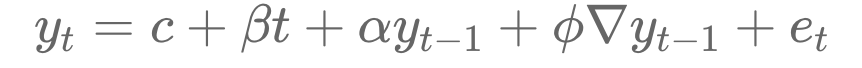
  - [address of ref](https://hongl.tistory.com/98)
  - 다음 수식에서 귀무가설 ($H_0 : \alpha = 1$)을 통계적으로 검정하는 방법이다. 
  - $\alpha$가이라면, 단위근을 가지는 것이므로, stationary하지 않음을 알 수 있다. 

- 해당 dataset에서 ADF Test를 통해 확인 $\to$ p-value도 0.05미만, 전반적으로 ADF Statisticr값이 Critical Value보다 낮으므로 통계적으로 stationary하다고 판단할 수 있다. 

---

---

> ## **Granger’s Causality Test**

    A(닭의 수)와 B(달걀의 수)가 있을 때 A(닭의 수)가 B(달걀의 수)를 그레인저 인과한다면(A granger causes B)
    B(달걀의 수)를 예측할 때 과거의 B(달걀의 수)값만을 사용하는 것보다 과거의 A(닭의 수)값도 사용한 예측이 더 많은 정보를 제공한다는 것이다. 즉, A의 변화가 B의 변화를 예측할 수 있다는 것.

    물론 이것이 일반적인 인과관계를 의미하는 것은 아니다. 
    여기서 말하는 인과관계? 시간적 인과관계, 혹은 시간적 순서를 의미한다. X, Y, Z의 세 변수가 있고 X가 Y,Z를 유발하는 원인이라 하자. 만약 X가 Y에 좀 더 빠르게 작용하고, Z에는 느리게 작용한다면 Y, Z를 대상으로 그레인저 인과관계를 검증할 때 Y가 Z를 그레인저 인과한다고 나오게 될 것이다. 여기서 Y가 Z의 원인이 아님은 물론이다. 인과관계임을 보이려면 다른 방법, 예를 들어 Y가 Z의 원인임을 이론적으로 설명해야 한다.

    하지만 이런 한계에도 불구하고 그레인저 인과검정은 매우 유용하다. 그레인저 인과관계가 없다면 인과관계가 없다는 것이기 때문이다. 뒤에 일어난 일이 먼저 일어난 일의 원인이 될 수는 없기 때문이다.

AR?
- 변수가 자기자신의 과거 자료에 영향을 받는 모형은 AR model이라 함
- 이때, 자시 자신의 과거 자료뿐만 아니라 여타 변수의 과거 자료에도 영향을 받는 모형을 벡터자귀회귀모형(VAR)이라 한다. 

> ### So, the basis behind VAR is that each of the time series in the system influences each other.

- Granger’s causality Tests the null hypothesis that the coefficients of past values in the regression equation is zero. So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis. This has been performed on original data-set.
  - 과거 값의 계수가 0이라는 영가설 검증
  - 계수가 0이다 = 관련 없다. 
  - 유의수준 0.05보다 작으면 기각한다. 
  - 즉 관련 있음을 알 수 있는 것이다. 
  - 유의수준 0.05보다 커서 기각할 수 없다면 관련 없음다고 결론 내릴 수 있는 것이다. 

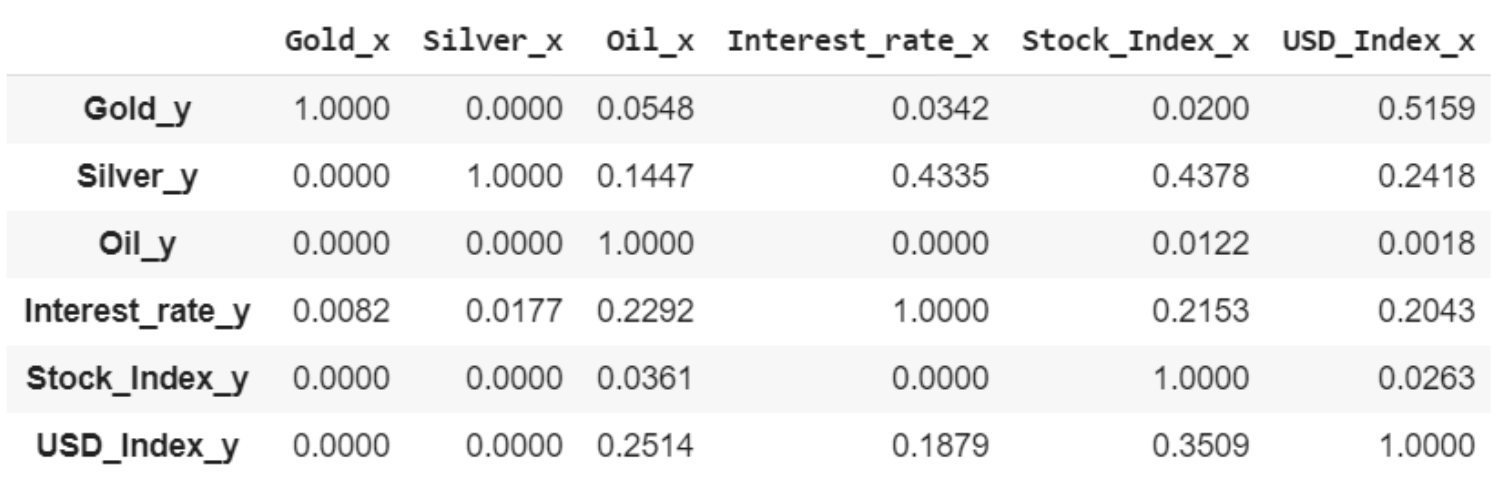

- ### as to `Gold_y`
  - silver_x에 대한 p-value가 0임.
    - 귀무가설 기각 가능
    - 즉, 과거 값의 계수가 0이 아니다
    - 즉 과거 값과 관련있다 할 수 있다. 
- ### as to `Interest_rate_y`
  - oil_x에 대한 p-value가 0.2292>0.05
  - 따라서 귀무가설 기각할 수 없음
  - 귀무가설 기각할 수 없다 = 과거 값 계수가 0이 아니라 할 수 없다. 
  - 즉 과거 값과 관련이 없다 
  

> # So, looking at the p-Values, we can assume that, except USD, all the other variables (time series) in the system are interchangeably causing each other. This justifies the VAR modeling approach for this system of multi time-series to forecast.

    p-value값이 유의 수준보다 작다 = 귀무가설 기각할 수 있다 = 과거 값 계수가 0이 아니다. = 과거 값이 관련이 있다. 
    이때 VAR model은 자기 자신의 과거 자료뿐만 아니라 여타 변수의 과거 자료에도 영향을 받는 모형.
   
    따라서 This justifies the VAR modeling approach for this system of multi time-series to forecast.
    

---

---

> ## **VAR model**

- VAR model은 정상성을 요구
  - 시간의 흐름에 따라 series가 변하지 않음을 의미.
  - Augmentes Dickey-Fuller Test나 차분 후 그려진 plot을 통해 해당 series의 정상성을 검증해볼 수 있었음

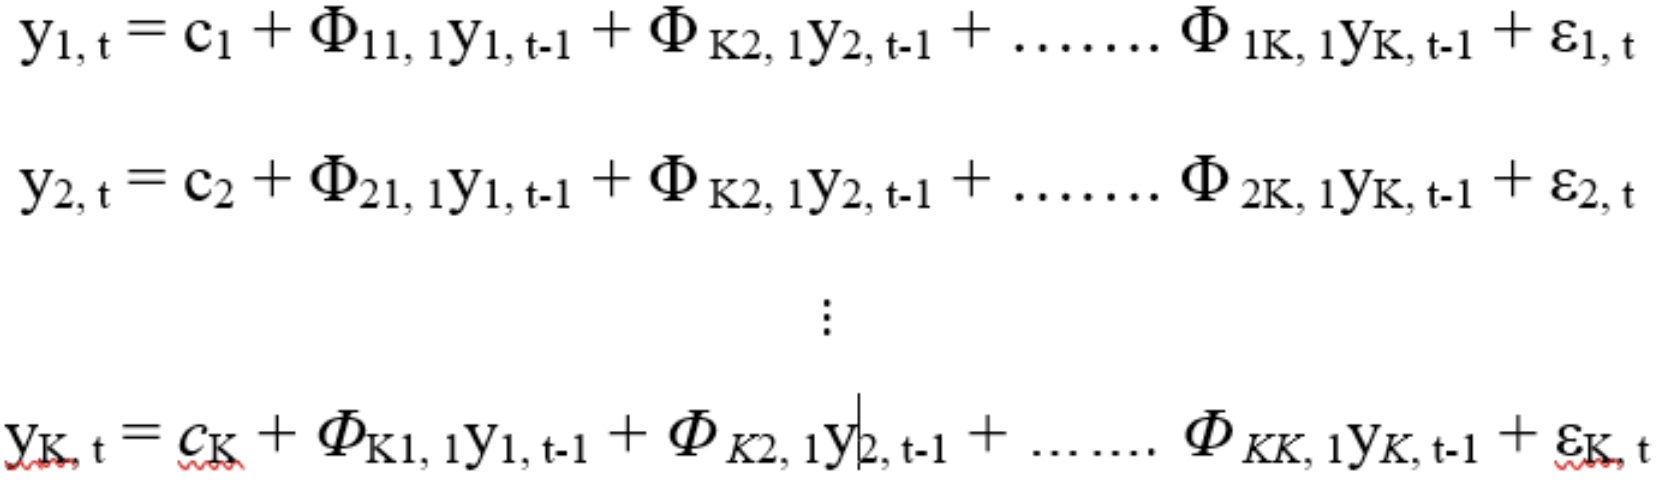